***
# <font color=red>ADS API 핸즈온 랩</font>
***

## 개요

이 노트북에서는 직원의 데모 그래픽 데이터 세트를 사용하여 데이터를 이해하기 위한 탐색 데이터 분석을 수행합니다. 그리고 AutoML을 사용하여 모델을 교육하고 이를 사용하여 예측을 수행하고 모델이 문제에 대해 얼마나 일반화되는지 평가합니다. 모델이 특정 요구 사항을 충족하는 경우 모델이 어떻게 작동하는지 조사합니다. 그런 다음 모델 및 예측 결과에 대한 이해를 높이고 실제 비즈니스에서이 모델을 사용할 수 있도록합니다.

## 시나리오

기업은 직원의 이직으로 인한 막대한 비용에 직면하고 있습니다. 기계 학습 및 데이터 과학의 발전으로 직원의 이직을 예측할 뿐만 아니라 이직률에 영향을 미치는 주요 변수를 이해할 수 있습니다.

## 워크샵 구성

 - <a href='#loadingdata'>Task 1 : Loading Data</a>
 - <a href='#datavisualization'>Task 2 : Data Visualization</a>
 - <a href='#datatransformations'>Task 3 : Data Transformations</a>
 - <a href='#trainingmodels'>Task 4 : Training Models</a>
 - <a href='#modelevaluation'>Task 5 : Model Evaluation</a>
 - <a href='#modelexplainability'>Task 6 : Model Explainability</a>

 ***

<a id='loadingdata'></a>
## <u>Task 1 : Loading Data</u>
##### https://docs.cloud.oracle.com/en-us/iaas/tools/ads-sdk/latest/user_guide/loading_data/loading_data.html

### 데이터 세트 이해

우선, 바이너리 분류의 개요를 이해해 봅시다. 이진 분류는 다음 분류 규칙에 따라 특정 데이터 세트의 레코드/요소를 두 그룹으로 분류하는 기술입니다. 직원의 이직 예측을 Leave(이직) 또는 Not Leave(이직하지 않음)가 두 개의 서로 다른 그룹으로 예측 분류합니다.

이러한 분류 규칙은 직원과 직원이 은퇴했는지 여부에 대한 정보가 포함된 교육 데이터 세트를 사용하여 모델을 교육할 때 생성됩니다.

이것은 가상 데이터 세트이며 약 1500 행을 포함합니다.

<font color=gray> 이 데이터세트는 3rd party이므로 오라클과의 계약에 근거한 콘텐츠 및 자료로 간주되지 않습니다. . 데이터 세트 `orcl_attrition`의 사용 허가에 대해서는 [여기] (oracle_data/UPL.txt)를 참조하십시오. 데이터 세트 `orcl_attrition`은 UPL 라이센스의 기초에 배포됩니다.
</font> 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import logging

logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

from ads.dataset.factory import DatasetFactory

データをロードする前に、データの内容を確認します。

In [2]:
df = pd.read_csv ('/home/datascience/oci-datascience-hol01/orcl_attrition.csv')
df

Age Attrition TravelForWork  SalaryLevel         JobFunction  \
0      42       Yes    infrequent         5054  Product Management   
1      50        No         often         1278  Software Developer   
2      38       Yes    infrequent         6296  Software Developer   
3      34        No         often         6384  Software Developer   
4      28        No    infrequent         2710  Software Developer   
...   ...       ...           ...          ...                 ...   
1465   37        No         often         4054  Software Developer   
1466   40        No    infrequent         2810  Software Developer   
1467   28        No    infrequent          710  Software Developer   
1468   50        No         often         4692  Product Management   
1469   35        No    infrequent         2880  Software Developer   

      CommuteLength EducationalLevel EducationField  Directs  EmployeeNumber  \
0                 2               L2  Life Sciences        1               1   
1                 9               L1  Life Sciences        1               2   
2                 3               L2          Other        1               4   
3                 4               L4  Life Sciences        1               5   
4                 3               L1        Medical        1               7   
...             ...              ...            ...      ...             ...   
1465             24               L2        Medical        1            2061   
1466              7               L1        Medical        1            2062   
1467              5               L3  Life Sciences        1            2064   
1468              3               L3        Medical        1            2065   
1469              9               L3        Medical        1            2068   

      ...  WeeklyWorkedHours StockOptionLevel  YearsinIndustry  \
0     ...                 80                0                8   
1     ...                 80                1               10   
2     ...                 80                0                7   
3     ...                 80                0                8   
4     ...                 80                1                6   
...   ...                ...              ...              ...   
1465  ...                 80                1               17   
1466  ...                 80                1                9   
1467  ...                 80                1                6   
1468  ...                 80                0               17   
1469  ...                 80                0                6   

      TrainingTimesLastYear  WorkLifeBalance YearsOnJob  YearsAtCurrentLevel  \
0                         0                1          6                    4   
1                         3                3         10                    7   
2                         3                3          0                    0   
3                         3                3          8                    7   
4                         3                3          2                    2   
...                     ...              ...        ...                  ...   
1465                      3                3          5                    2   
1466                      5                3          7                    7   
1467                      0                3          6                    2   
1468                      3                2          9                    6   
1469                      3                4          4                    3   

     YearsSinceLastPromotion  YearsWithCurrManager               name  
0                          0                     5        Tracy Moore  
1                          1                     7      Andrew Hoover  
2                          0                     0         Julie Bell  
3                          3                     0       Thomas Adams  
4                          2                     2  Johnathan Burnett  
...               

csvファイルをデータセットとしてロードします。下記の例では、予測対象の特徴量を同時に指定しています。

In [3]:
ds = DatasetFactory.open("/home/datascience/oci-datascience-hol01/orcl_attrition.csv", target="Attrition").set_positive_class('Yes')

### Option Tasks

以下のコードで処理中のCPU、メモリの使用率の確認ができます。

In [4]:
from ads.common.analyzer import resource_analyze
from ads.dataset.factory import DatasetFactory

@resource_analyze
def fetch_data():
    ds2 = DatasetFactory.open("/home/datascience/oci-datascience-hol01/orcl_attrition.csv", 
                              target="Attrition").set_positive_class('Yes')
    return ds

ds = fetch_data()

Loading BokehJS ...

---
<a id='datavisualization'></a>
## <u>Task 2 : Data Visualization</u>
##### https://docs.cloud.oracle.com/en-us/iaas/tools/ads-sdk/latest/user_guide/visualization/visualization.html

`show_in_notebook` 함수에 데이터셋을 전달하면, 다음 4개 항목을 확인할 수 있습니다. 

  - Summary : 데이터세트, 행, 열의 간략한 설명 및 각 항목의 통계량을 확인할 수 있습니다.
  - Feature summary : 각 항목의 분포를 박스 플롯이나 카운터 플롯 등의 차트에서 확인할 수 있습니다.
  - Correlations: 각 특징량의 상관관계를 히트맵으로 확인할 수 있습니다.
  - Warnings : 데이터 분포에 대한 주의점을 확인할 수 있습니다.

참고: 이 함수는 데이터세트에 대한 다양한 차트를 생성하므로 비교적 긴 처리 시간이 필요한 점에 유의하십시오. 노트북 윈도우 왼쪽 하단의 상태가 'Busy'가 되므로 처리가 완료되고 'Idle'이 되고 나서 다음의 처리를 실행해 주세요.

In [5]:
ds.show_in_notebook()

Accordion(children=(HTML(value='<h3>Type: BinaryClassificationDataset</h3><h3>1,470 Rows, 36 Columns</h3><h4>C…

Here we just see how we can instruct  `show_in_notebook` to open the `correlations`. You only need to pass in enough characters to uniquely identify the section.

### Option Tasks 

다음 코드를 실행하여 데이터셋의 내용을 확인할 수 있습니다. 

In [6]:
# 行数、列数の確認

ds.shape

(1470, 36)

In [7]:
# 先頭5行の確認

ds.head()

Age  Attrition TravelForWork  SalaryLevel         JobFunction  \
0   42       True    infrequent         5054  Product Management   
1   50      False         often         1278  Software Developer   
2   38       True    infrequent         6296  Software Developer   
3   34      False         often         6384  Software Developer   
4   28      False    infrequent         2710  Software Developer   

   CommuteLength EducationalLevel EducationField  Directs  EmployeeNumber  \
0              2               L2  Life Sciences        1               1   
1              9               L1  Life Sciences        1               2   
2              3               L2          Other        1               4   
3              4               L4  Life Sciences        1               5   
4              3               L1        Medical        1               7   

   ...  WeeklyWorkedHours StockOptionLevel  YearsinIndustry  \
0  ...                 80                0                8   
1  ...                 80                1               10   
2  ...                 80                0                7   
3  ...                 80                0                8   
4  ...                 80                1                6   

   TrainingTimesLastYear  WorkLifeBalance YearsOnJob  YearsAtCurrentLevel  \
0                      0                1          6                    4   
1                      3                3         10                    7   
2                      3                3          0                    0   
3                      3                3          8                    7   
4                      3                3          2                    2   

  YearsSinceLastPromotion  YearsWithCurrManager               name  
0                       0                     5        Tracy Moore  
1                       1                     7      Andrew Hoover  
2                       0                     0         Julie Bell  
3                       3                     0       Thomas Adams  
4                       2                     2  Johnathan Burnett  

[5 rows x 36 columns]

In [8]:
# 목적변수 통계량

ds.type_of_target()

{
  "type": "categorical",
  "low_level_type": "category",
  "missing_percentage": 0.0,
  "stats": {
    "unique percentage": 0.1360544217687075,
    "mode": false,
    "count": 1470,
    "unique": 2,
    "top": false,
    "freq": 1233
  },
  "feature_name": "Attrition"
}

---
<a id='datatransformations'></a>
## <u>Task 3 Data Transformations</u>
##### https://docs.cloud.oracle.com/en-us/iaas/tools/ads-sdk/latest/user_guide/data_transformation/data_transformation.html

<a id='trans'></a>
### Get and Apply Transformation Recommendations

ADS는 데이터셋를 변환하는 기능을 제공합니다. 예를 들어, Up/Down Sampling 프로세스를 통해서 클래스 불균형 문제를 해결할 수 있습니다. 데이터셋을 변환하는 두 가지 유형을 제공합니다. `auto_transform()`를 사용해, 자동적으로 실시하는 방법과, 제안된 변환을 탐색할 수 있는 노트북 UI `get_recommendations()`를 사용하는 방법입니다.

모든 ADS 데이터셋은 변경되지 않으며, 적용되는 변환은 모두 새로운 데이터셋을 만듭니다. 

참고 : get_recommendations()는 더 이상 사용되지 않으며 suggest_recommendations()로 대체되었습니다. 이것은 모든 권장 사항과 각 작업을 구현하기위한 권장 코드가 포함 된 pandas 데이터 프레임을 반환합니다. 자세한 내용은 아래 릴리스 노트를 참조하십시오.

ADS 릴리즈 노트 - 4월 30 2020
https://docs.cloud.oracle.com/en-us/iaas/tools/ads-sdk/latest/release_notes.html#april-30-2020


In [9]:
ds.suggest_recommendations()

Code
Message                                  Variables         Suggested              Action                                                      
Constant Column                          Directs           Drop                   Drop                              .drop_columns(["Directs"])
                                         Over18            Drop                   Drop                               .drop_columns(["Over18"])
                                         WeeklyWorkedHours Drop                   Drop                    .drop_columns(["WeeklyWorkedHours"])
Contains mostly unique values(100.00%)   EmployeeNumber    Drop                   Drop                       .drop_columns(["EmployeeNumber"])
                                                                                  Do nothing                                                  
Strongly correlated with PerformanceR... PercentSalaryHike Drop PerformanceRating Drop PercentSalaryHike  .drop_columns(["PercentSalaryHike"])
                                                                                  Drop PerformanceRating  .drop_columns(["PerformanceRating"])
                                                                                  Do nothing                                                  
Strongly correlated with name(99.60%.)   MonthlyIncome     Drop name              Drop MonthlyIncome          .drop_columns(["MonthlyIncome"])
                                                                                  Drop name                            .drop_columns(["name"])
                                                                                  Do nothing                                                  
Strongly correlated with name(99.31%.)   MonthlyRate       Drop MonthlyRate       Drop MonthlyRate              .drop_columns(["MonthlyRate"])
                                                                                  Drop name                            .drop_columns(["name"])
                                                                                  Do nothing                                                  
Strongly correlated with name(99.54%.)   SalaryLevel       Drop name              Drop SalaryLevel              .drop_columns(["SalaryLevel"])
                                                                                  Drop name                            .drop_columns(["name"])
                                                                                  Do nothing                                                  
Imbalanced Target(19.22%)                Attrition         Do nothing             Do nothing                                                  
                                                                                  Down-sample                                   .down_sample()
                                                                                  Up-sample                      .up_sample(sampler='default')

다음 3개 항목을 삭제합니다. 

In [10]:
transformed_ds = ds.drop_columns(["Directs", "Over18", "WeeklyWorkedHours"])

In [18]:
transformed_ds.shape

(1470, 33)

### Option Tasks

데이터 세트에 Up-sample이나 Down-sampele을 적용하여 데이터 세트의 내용을 확인할 수 있습니다. 

In [12]:
transformed_ds2 = ds.drop_columns(["Directs", "Over18", "WeeklyWorkedHours"]).down_sample()
transformed_ds2.shape
transformed_ds2.head()
transformed_ds2.show_in_notebook()

Accordion(children=(HTML(value='<h3>Type: BinaryClassificationDataset</h3><h3>475 Rows, 33 Columns</h3><h4>Col…

---
<a id='trainingmodels'></a>
## <u>Task 4 : Training Models</u>
##### https://docs.cloud.oracle.com/en-us/iaas/tools/ads-sdk/latest/user_guide/automl/automl.html
<a id='automl'></a>

AutoML Python 패키지는 지정된 학습 데이터셋과 예측 작업을 최적으로 모델링하기 위한 튜닝된 ML 파이프라인을 자동으로 제공합니다. 여기에서는 데이터 세트를 학습에 적용합니다. Oracle AutoML은 ML 파이프 라인의 세 가지 주요 단계 인 "피처 선택 최적화", "알고리즘 선택 최적화", "하이퍼 파라미터 최적화"를 자동화합니다.

AutoML에는 간단한 파이프라인 수준의 Python API가 있어 모든 예측 작업에 적절한 기능을 제공하고 적절하게 튜닝된 모델에서 데이터 과학 프로세스를 빠르게 시작할 수 있습니다.

AutoML은 세 가지 기본 모듈로 구성됩니다. 자동화된 특징의 선택, 알고리즘의 선택, 하이퍼 파라미터의 최적화입니다. 이러한 요소는 간단한 AutoML 파이프라인에 쉽게 결합되며 제한된 사용자 입력/작업으로 전체 파이프라인을 자동으로 최적화합니다.

앞으로는 보다 다양한 문제를 해결하는 추가 'Provider'가 생성됩니다. 이는 개별 순위, 클러스터링, 주제 모델링, 권장 엔진 등입니다. 자신만의 것을 만들고 ADS에서 사용할 수도 있습니다.

또한 ADS는 데이터 세트를 트레이닝 세트와 테스트 세트로 분할하는 기능을 제공합니다.

In [21]:
from ads.automl.provider import OracleAutoMLProvider
ml_engine = OracleAutoMLProvider()

여기서는 ADS AutoML 드라이버를 사용하여 Oracle AutoML을 호출하고 `driver.AutoML`이 기저 모델을 만드는 튜닝 된 모델을 구축합니다. 

  - 숫자가 예측되는 회귀 예측 모델링 문제의 경우, baseline 알고리즘은 교육 데이터 세트의 평균을 예측합니다.
  - 카테고리 값이 예측되는 분류 예측 모델링 문제의 경우, baseline 알고리즘은 트레이닝 데이터 세트에서 가장 관측치가 높은 클래스 값을 예측합니다.
  
기계 학습 알고리즘이 이 문제에 숙련되어 있음을 입증하려면 이 값보다 높은 정확도를 달성해야 합니다. 여기서 ADS가 제공하는 가치는 다음과 같습니다.

  - BaseLine 알고리즘을 사용하여 회귀 문제의 기준선 성능을 만드는 방법.
  - BaseLine 규칙 알고리즘을 사용하여 분류 문제의 기준선 성능을 만드는 방법.
  - AutoML 공급자가 다음 항목을 고려하여 튜닝된 모델을 생성하는 방법:
    - 이상적인 특징의 조합
    - 최소 샘플링 크기
    - 최적의 알고리즘 선택
    - 알고리즘 별 하이퍼 파라미터의 최상의 세트

참고: 여기에서는 'min_features'를 사용하여 AutoML에 feature_selection 다음에 특정 기능이 포함되도록 합니다. 이는 이 노트북의 샘플 설명이 AutoML에 의해 선택된 유효한 특징량으로 작동하는지 확인하기 때문입니다.

### 인공지능 알고리즘 학습 
사용하고 있는 데이터셋에 다라서 다르지만 AutoML이 만들어지는 시간은 상당히 걸립니다. 화면 왼쪽 하단의 상태가 "Idle"로 설정된 후 다음 작업을 수행합니다.

In [22]:
from ads.automl.driver import AutoML

train, test = transformed_ds.train_test_split()
automl = AutoML(train, provider=ml_engine)

model, baseline = automl.train(score_metric = "roc_auc",
                               time_budget=160)

ADSModel`객체는 AutoML 공급자`에 의해 생성된 실제 모델을 래핑합니다. 이렇게 하면 속성이 실제 모델에 위임되므로 다음 중 하나를 확인할 수 있습니다.

(✓는 차트에서 시각화 할 수있는 항목입니다.

  - ranked_models_
  - num_fs_evals_
  - selected_features_names_
  - selected_model_params_
  - tuning_trials_ ✓
  - adaptive_sampling_trials_ ✓
  - feature_selection_trials_ ✓
  - model_selection_trials_ ✓

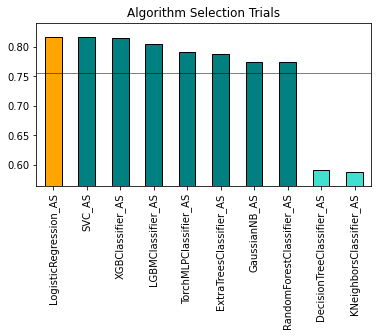

In [23]:
automl.visualize_algorithm_selection_trials()

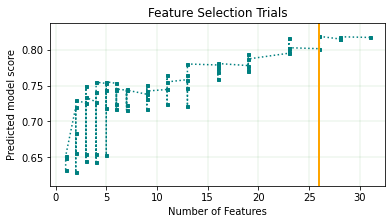

In [24]:
automl.visualize_feature_selection_trials()

モデルトレーニングのハイパーパラメーターチューニングがどのように最適化されているかを確認します。パラメータ空間を反復する過程で、モデルはより良くなります。

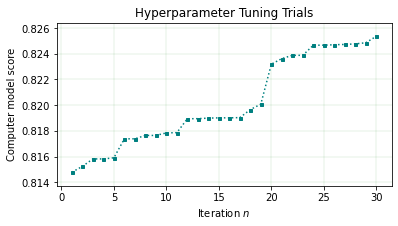

In [25]:
automl.visualize_tuning_trials()

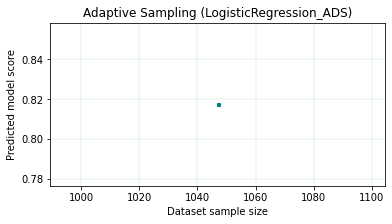

In [26]:
automl.visualize_adaptive_sampling_trials()

### Option Tasks

In [28]:
model2, baseline2 = automl.train(model_list=['LogisticRegression',
                                           'LGBMClassifier',
                                           'XGBClassifier',
                                           'RandomForestClassifier'], 
                               score_metric = "roc_auc",
                               time_budget=160)

In [29]:
model3, baseline3 = automl.train(model_list=['LogisticRegression',
                                           'LGBMClassifier',
                                           'XGBClassifier',
                                           'RandomForestClassifier'], 
                               min_features=['OverTime', 'JobLevel'], 
                               score_metric = "roc_auc",
                               time_budget=160)

---
<a id='modelevaluation'></a>
## <u>Task 5 : Model Evaluation</u>
##### https://docs.cloud.oracle.com/en-us/iaas/tools/ads-sdk/latest/user_guide/eval/eval.html

구축된 예측 모델이 유효한가 어떤가를 평가합니다. ADS 워크플로우 중에서도 특히 중요한 단계입니다. 이 기술 영역은 자주 향상되고 앞으로도 기능이 추가됩니다. 이제 현재 다음 분석을 지원합니다.

  - `회귀 (regression)`
  - `바이너리 분류(binary classification)`
  - `멀티 클래스 분류 (multiclass classification)`
  
ADS는 여러 모델에서 수행하는 복잡한 계산을 지원하므로 고유한 평가 함수(`y_true` 및 `y_pred`시리즈 지정)를 제공하는 기능도 지원합니다.

다음 셀 중 일부는 분류 평가 플롯의 몇 가지 예를 보여줍니다. `ADSEvaluator(test, models=[model, my_model, baseline]`` 행의 각 모델은 비교를 위해 겹쳐져 있는 메트릭 시리즈를 가지고 있습니다. 없기 때문에 나란히 표시됩니다.

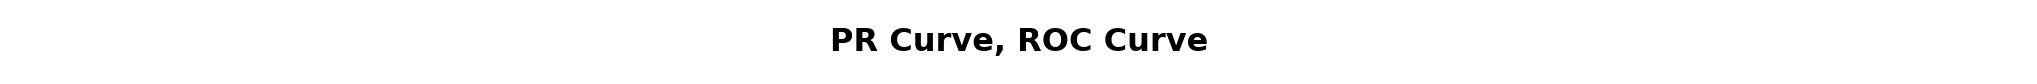

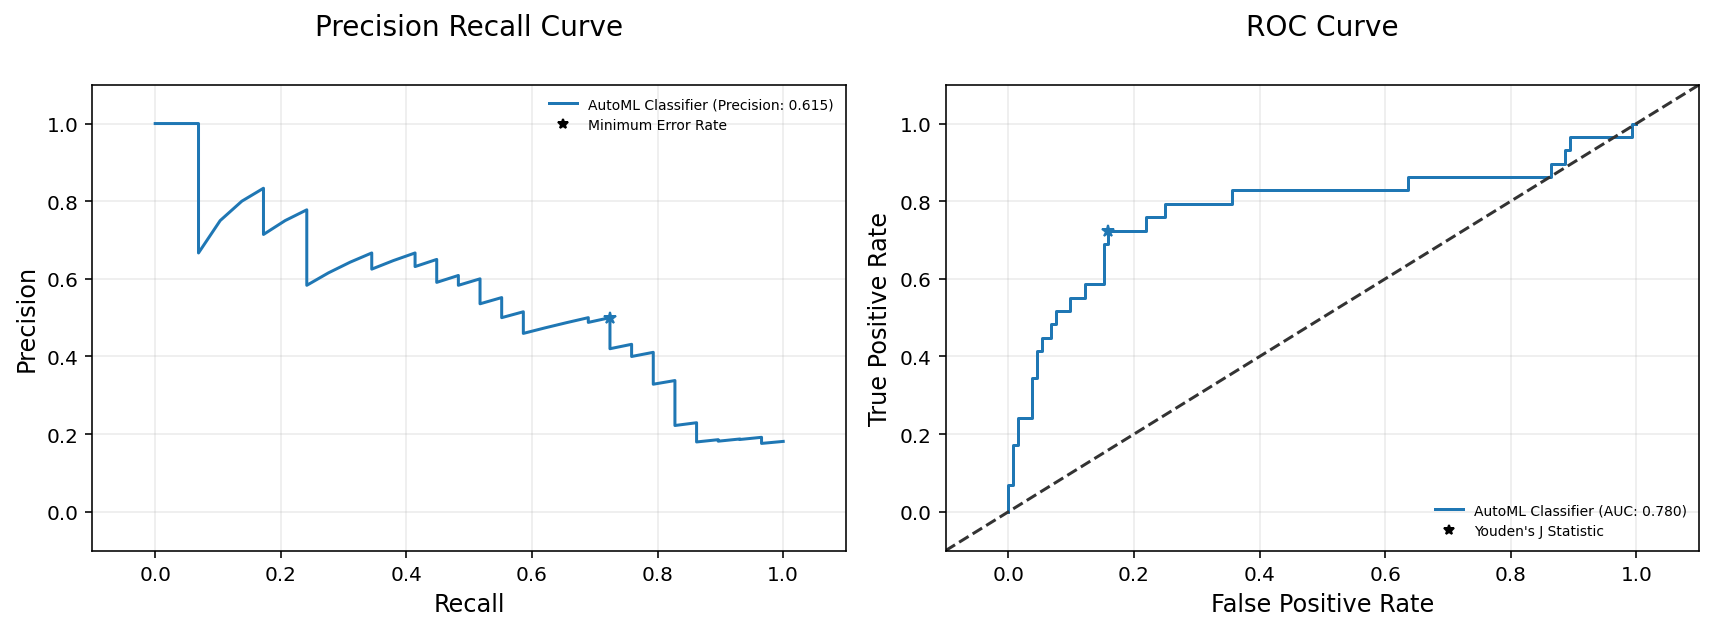

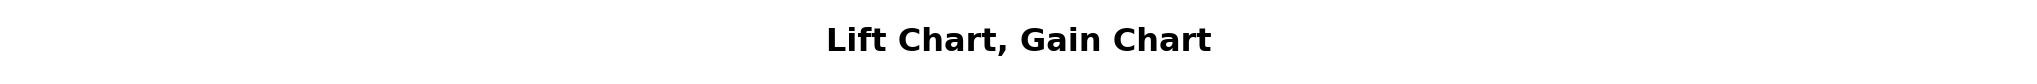

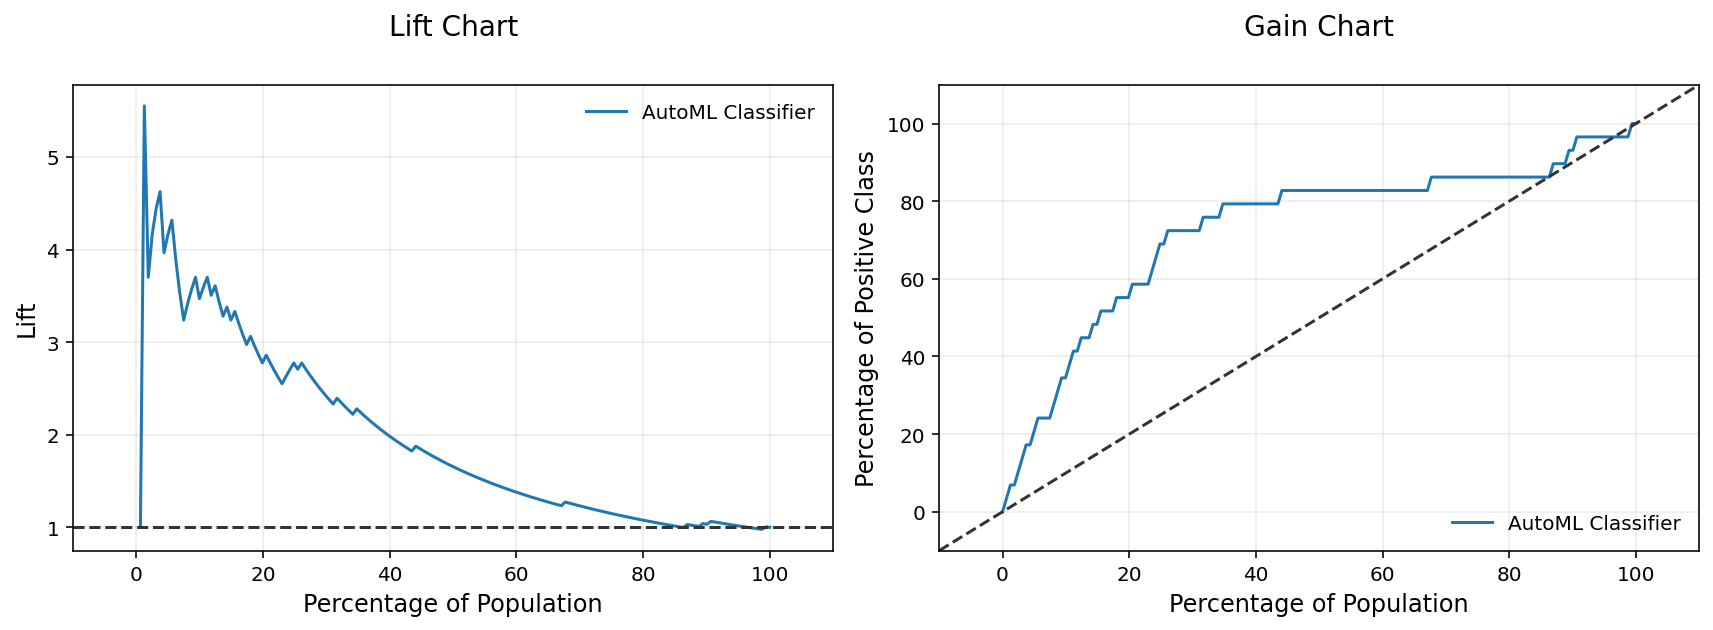

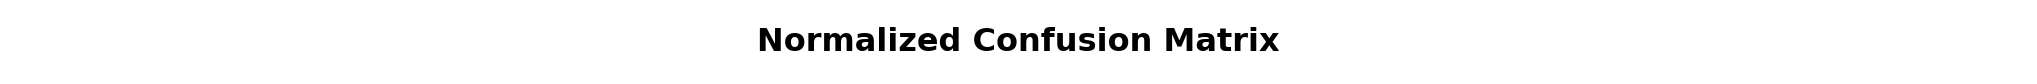

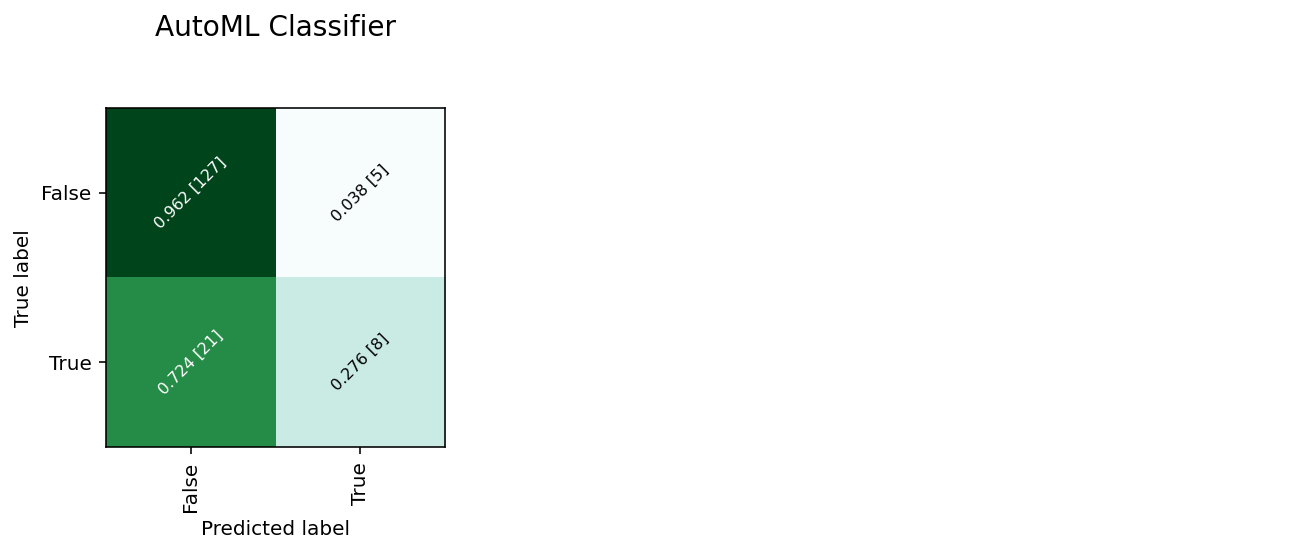

In [30]:
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import MLData

# evaluator = ADSEvaluator(test, models=[model, baseline], training_data=train)
evaluator = ADSEvaluator(test, models=[model], training_data=train)
evaluator.show_in_notebook()

### <u>Option Tasks - LightGBM 모델을 구축하고 AutoML 모델과 비교</u>

In [31]:
from collections import defaultdict
from ads.common.model import ADSModel
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.base import TransformerMixin
from category_encoders.ordinal import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

class DataFrameLabelEncoder(TransformerMixin):
    def __init__(self):
        self.label_encoders = defaultdict(LabelEncoder)
        
    def fit(self, X):
        for column in X.columns:
            if X[column].dtype.name  in ["object", "category"]:
                self.label_encoders[column] = OrdinalEncoder()
                self.label_encoders[column].fit(X[column])
        return self
    
    def transform(self, X):
        for column, label_encoder in self.label_encoders.items():
            X[column] = label_encoder.transform(X[column])
        return X

X = train.X.copy()
y = train.y.copy()

le = DataFrameLabelEncoder()
X =le.fit_transform(X)

sk_clf = RandomForestClassifier(random_state=42)
sk_clf.fit(X, y)

# Build an ads model from the SVM classifier
my_model = ADSModel.from_estimator(make_pipeline(le, sk_clf), name=sk_clf.__class__.__name__)


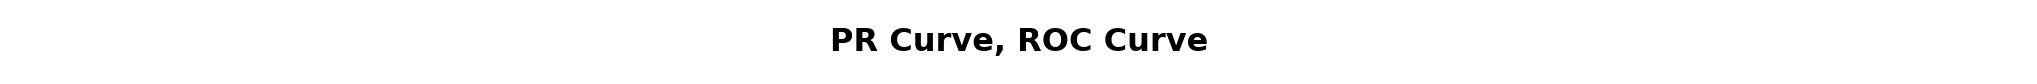

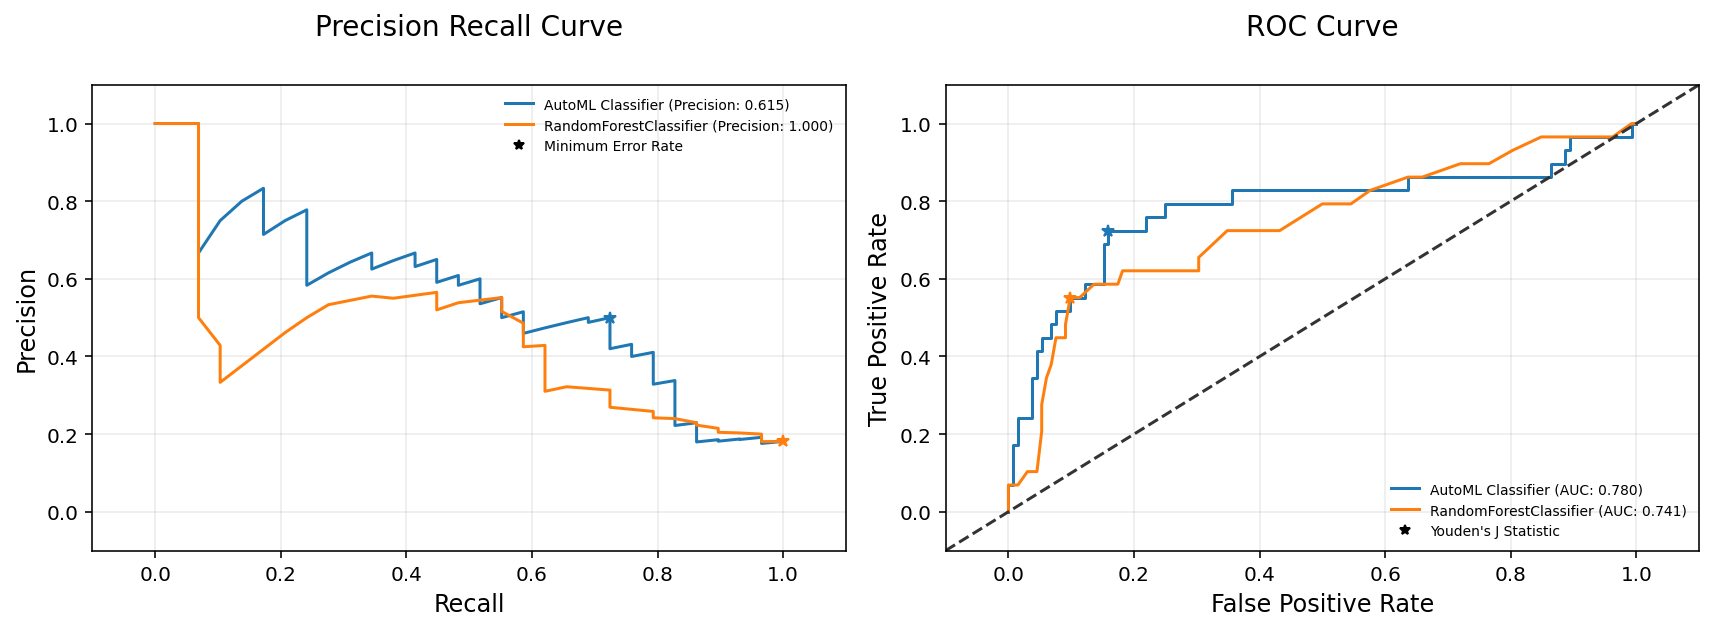

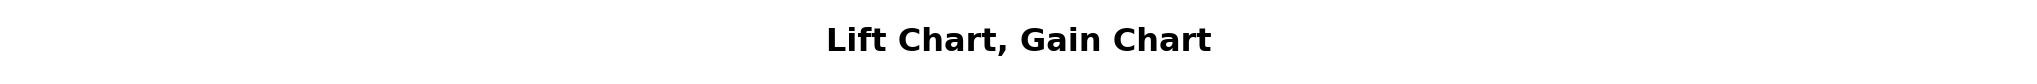

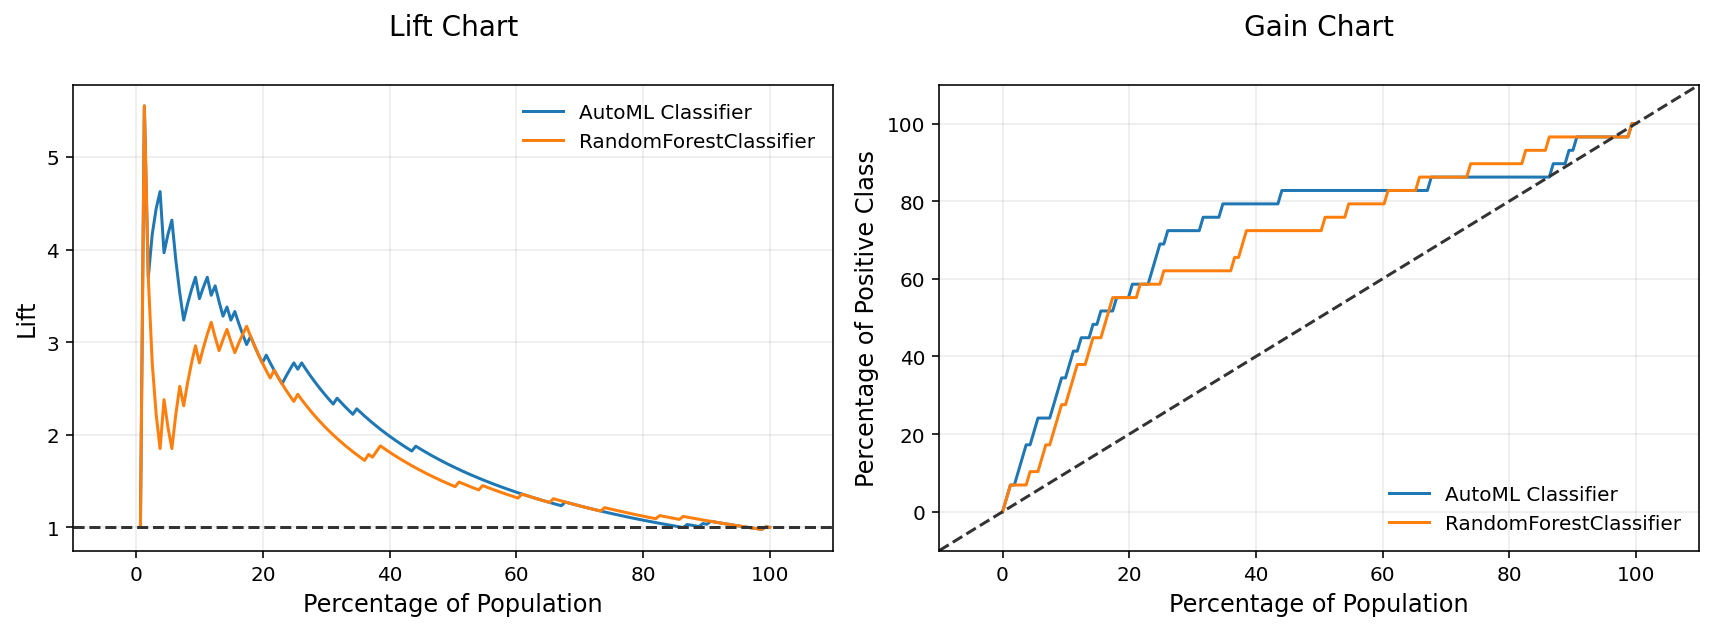

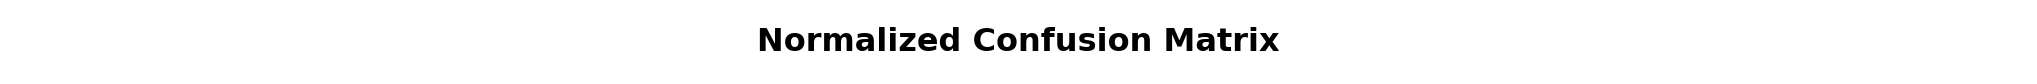

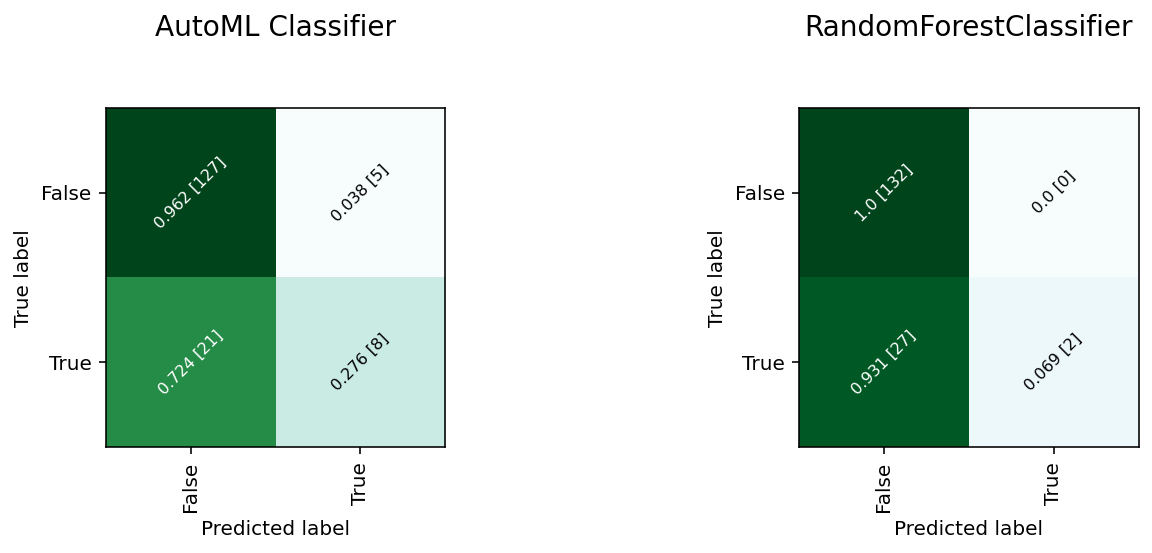

In [32]:
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import MLData

# evaluator = ADSEvaluator(test, models=[model, my_model, baseline], training_data=train)
evaluator = ADSEvaluator(test, models=[model, my_model], training_data=train)
evaluator.show_in_notebook()

---
<a id='modelexplainability'></a>
## <u>Task 6 : Model Explainability</u>
##### https://docs.cloud.oracle.com/en-us/iaas/tools/ads-sdk/latest/user_guide/mlx/mlx.html

기계 학습과 심층 학습은 다음과 같은 이유로 보급되어 왔습니다.

  - 다양한 다른 도메인에서 복잡한 문제를 해결할 수 있습니다.
  - 최신 컴퓨팅 리소스의 성능과 효율성 향상
  - 대용량 데이터의 광범위한 가용성
    
그러나 문제의 크기와 복잡성이 계속 증가함에 따라 이러한 문제에 적용되는 기계 학습 알고리즘의 복잡성도 커지고 있습니다. 기계 학습 알고리즘의 고유하고 증가하는 복잡성으로 인해 모델이 학습한 것 또는 미리 결정된 예측이 수행된 이유를 이해하기가 어려우므로 기계 학습 채택에 대한 장벽이 될 수 있습니다.

기계 학습 설명 가능성(MLX)은 기계 학습 모델과 딥 러닝 모델을 설명하고 해석하는 프로세스입니다.

MLX는 기계 학습 개발자가 다음을 수행할 수 있도록 지원합니다.
 - 모델의 동작을 더 잘 이해하고 해석합니다.
   - 예를 들어, 모델은 어떤 특징량을 중요하게 간주합니까? 특징 값과 목표 예측 간에는 어떤 관계가 있습니까?
 - 모델 디버깅 및 품질 향상.
   - 예를 들어 모델이 예기치 않은 것을 배웠습니까? 모델이 일반화되었습니까? 아니면 교육/검증/테스트 데이터 세트에 고유한 것을 배우셨습니까?
 - 모델 배포에 대한 신뢰를 높입니다.
  
MLX는 기계 학습 알고리즘의 최종 사용자가 다음을 수행할 수 있도록 지원합니다.
  - 모델이 특정 예측을 수행한 이유를 이해합니다.
    - 예를 들어 은행 대출이 거부된 이유는 무엇입니까?
   
MLX의 몇 가지 유용한 용어 :
  - **설명 가능성**: 기계 학습 모델 예측 뒤에 있는 이유를 설명하는 기능.
  - **해석 가능성**: 인간이 설명을 이해할 수 있는 수준.
  - **글로벌 설명**: 기계 학습 모델 전체의 동작을 이해합니다.
  - **로컬 설명**: 기계 학습 모델이 단일 예측을 수행한 이유를 이해합니다.
  - **모델 독립적인 설명**: 설명에서는 모델 속성을 사용하여 설명을 안내하는 대신 기계 학습 모델(및 특징량 전처리)을 블랙박스로 취급합니다.

MLX는 두 가지 유형의 해석 (로컬과 글로벌)을 제공합니다.

## Feature Permutation Importance

대부분의 경우 분석가는 완성된 예측 모델이 어떤 특징을 중요시하는지 알고 싶습니다. Feature Permutation Importance는 훈련된 기계 학습 모델의 예측에 대한 각 특징량의 중요도를 추정하고 평가하며 기계 학습 모델의 동작에 대한 통찰력을 제공합니다.

### 알고리즘 개요

Feature Permutation Importance를 계산하는 방법의 개요는 매우 간단합니다. 생성된 모델의 예측 오류를 계산하고 이를 기준으로 합니다. 여기에서, 임의의 특징량의 값을 셔플 해, 그 특징량이 기능하지 않는 상황을 만듭니다. 그 상태에서 모델을 생성하고 마찬가지로 예측 오류를 계산합니다. 이것을 모든 특징량마다 반복해, 예측 에러가 기준선으로부터 어느 정도 괴리하고 있는지를 랭킹으로 합니다. 베이스라인으로부터의 괴리가 클수록 그 특징량은 영향이 컸다고 보인다는 생각입니다.

다음은 특징 순열의 중요성에 대한 설명을 계산하는 주요 단계를 요약한 것입니다.

- 훈련된 기계 학습 모델을 사용합니다.
- 특정 데이터 세트(교육 데이터 세트 및 테스트 데이터 세트 등)에 대한 기준선 예측 오류를 계산합니다.
- 각 특징량에 대해 :
    1. 지정된 데이터세트의 피쳐 열을 무작위로 셔플합니다.
    2. 셔플된 데이터 세트의 예측 오차를 계산합니다.
    3. 기준선 점수와 셔플된 데이터 세트 점수의 차이를 특성의 중요도로 저장합니다(예: $baseline$\_$score$ - $shuffled$\_$score$).
- 1~3단계를 여러 번 반복하고 평균을 보고하여 랜덤 셔플의 영향을 줄입니다.
- 각 특징 량이 모델 점수에 미치는 평균 영향에 따라 특징 량을 평가합니다. 셔플 할 때 점수에 큰 영향을 미치는 특징 량에는 모델 점수에 거의 또는 전혀 영향을 미치지 않는 특징 량보다 높은 중요도가 할당됩니다.
- 어떤 경우에는 중요하지 않은 특성을 무작위로 정렬하면 실제로 모델 예측에 긍정적인 영향을 미칠 수 있습니다. 이 경우 모델 예측에 대한 특징 량의 기여는 잡음이됩니다. Feture Permutation Importance의 시각화에서 MLX는 음의 특징량 중요도 값을 0으로 간주합니다.

### 출력 해석

Feature Permutation Inportance 설명은 중요도 값과 함께 특징의 순서가 지정된 목록을 생성합니다. 이 알고리즘의 출력 해석은 간단합니다. 순위가 높은 피처는 모델 예측에 미치는 영향이 크고 순위가 낮은 피처는 모델 예측에 미치는 영향이 적습니다. 또한, 중요도 값은 특징량의 상대적인 중요도를 나타냅니다.

막대 그래프는 상대적인 특징량의 중요성에 대한 모델의 뷰를 보여줍니다. X축은 특징량의 중요성을 강조합니다. 긴 막대는 짧은 막대보다 중요도가 높음을 나타냅니다. 각 막대는 알고리즘의 모든 반복에서 중요도 값의 표준 편차와 함께 평균 특성 중요도 값도 표시합니다(\<$mean$\_$importance$\>±\<$standard$\_ $ deviation $ \>) . 위에서 언급했듯이 음의 중요도 값은 0으로 제한됩니다. Y축은 다양한 특징량을 상대적인 중요도의 순서로 표시합니다(Y축 위에 표시되는 특징량만큼 중요).

In [33]:
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer

# our model explainer class
explainer = ADSExplainer(test, model)

# let's created a global explainer
global_explainer = explainer.global_explanation(provider=MLXGlobalExplainer())

# Compute the global Feature Permutation Importance explanation
importances = global_explainer.compute_feature_importance()

In [34]:
# Visualize the top 6 features as a bar chart
importances.show_in_notebook(n_features=6)

## Partial Dependence Plots (PDP) and Individual Conditional Expectation (ICE) Explanations

PDP와 ICE는 모델에 제약되지 않는 글로벌 설명 방법으로, 특정 피처와 타겟 변수 간의 관계를 평가합니다.

### 알고리즘에 대해 자세히 알아보기

다음은 PDP 또는 ICE 설명을 계산할 때 주요 절차를 요약합니다.

  - 훈련된 기계 학습 모델을 활용합니다.
  - 설명할 특징량을 선택합니다(예: 글로벌 특징량의 정렬 중요성 설명에 명시된 중요한 특징량).
  - MLX는 트레이닝 데이터 세트에서 추출한 선택된 피쳐의 값 분포를 사용하여 평가할 피처의 분포에서 여러 가지 값을 선택합니다. 사용할 값의 수와 고려해야 할 특징의 분포 범위는 설정할 수 있습니다.
  - MLX는 제공된 데이터세트의 모든 샘플을 피쳐 분포에서 동일한 피쳐 값으로 대체하고 확장된 데이터세트에서 모델 추론을 계산합니다. 이 프로세스는 피쳐 분포에서 선택된 모든 값에 대해 반복됩니다. 특징 량 분포에서 $ N $ 개의 다른 값을 선택하면이 프로세스는 $N$ 개의 다른 데이터 세트를 생성합니다. 선택된 특징량은 각각 해당 데이터 세트의 모든 샘플에서 동일한 값을 갖습니다. 그런 다음 모델 추론은 $N$의 다른 모델 예측을 생성하고 각각은 $M$ 값을 포함합니다 (확장 데이터 세트의 각 샘플에 하나씩).
  - ICE의 경우, 제공된 데이터세트 내의 각 확장 샘플의 모델 예측(선택된 특징량의 값이 특징량 분포의 값으로 대체된 경우)은 개별적으로 고려됩니다. 이렇게 하면 $N$x$M$의 값이 달라집니다.
  - PDP의 경우, 평균 모델 예측은 제공된 모든 확장된 데이터 세트 샘플에 걸쳐 계산됩니다. 이렇게 하면 $N$의 다른 값이 생성됩니다(각각 평균 ​​$M$ 예측).

### 출력 해석

**PDP**
  - One-feature
      - 연속 또는 이산 수치 특징량: 꺾은선형 차트로 시각화. 각 선은 선택된 피쳐가 지정된 값을 가지는 경우 제공된 데이터세트의 모든 샘플에 걸친 모델로부터의 평균 예측을 나타냅니다. x축은 선택된 특징값을 나타내고 y축은 목표 변수를 나타냅니다(예: 분류 작업의 예측 확률 및 회귀 작업의 원시 예측값).
      - 카테고리 기능 : 세로 막대 그래프로 시각화. 각 막대는 선택한 피쳐에 지정된 값이 있는 경우 제공된 데이터세트의 모든 샘플에 걸친 모델의 평균 예측을 나타냅니다. X축은 선택된 특징량의 다양한 값을 나타내고 Y축은 목표 변수를 나타냅니다(예: 분류 작업의 예측 확률 및 회귀 작업의 원시 예측값).
  - Two-feature
      - 히트 맵으로 시각화. x축과 y축 모두에 선택된 특징값이 표시됩니다. Z축(히트맵 색상)은 선택된 피처에 해당하는 값이 있는 경우(제공된 데이터 세트의 모든 샘플에 걸쳐) 모델의 평균 예측을 나타냅니다.
 
**ICE**
 - 연속 또는 이산 수치 특징량: 꺾은선형 차트로 시각화. PDP는 제공된 데이터세트의 모든 샘플에 대한 평균 예측을 나타내지만, ICE는 제공된 데이터세트의 모든 샘플을 개별적으로 줄거리. x축은 선택된 특징값을 나타내고 y축은 목표 변수를 나타냅니다(예: 분류 작업의 예측 확률 및 회귀 작업의 원시 예측값). 중앙값은 추세를 강조하기 위해 플롯할 수 있습니다. ICE 플롯은 특징 분포로부터의 첫 번째 예측을 중심으로 할 수 있습니다 (즉, 각 예측은 첫 번째 샘플에서 예측값을 뺍니다).
 - 카테고리 기능 : 바이올린 플롯으로 시각화. X축은 선택된 특징량의 다양한 값을 나타내고 Y축은 목표 변수를 나타냅니다(예: 분류 작업의 예측 확률 및 회귀 작업의 원시 예측값).
  
PDP와 ICE 모두의 시각화는 대응하는 축상의 열차 데이터세트로부터의 특징값 분포를 표시한다. 예를 들어, 한 피쳐의 꺾은선형 차트, 막대형 차트 및 바이올린 플롯은 x축에 피쳐 값의 분포를 보여줍니다. 히트맵은 각 x축 또는 y축에 대한 특징값의 분포를 나타냅니다.

In [35]:
monthly_income = explainer.global_explanation().compute_partial_dependence("MonthlyIncome")

In [36]:
monthly_income.show_in_notebook(mode="ice", labels=[False], show_median=False)

In [37]:
monthly_income.show_in_notebook(mode="pdp", labels=[False])

## Local Explanations


In [50]:
# With ADSExplainer, create a local explanation object using the MLXLocalExplainer provider
from ads.explanations.mlx_local_explainer import MLXLocalExplainer

local_explainer = explainer.local_explanation(provider=MLXLocalExplainer())

In [51]:
# Select a specific sample (instance/row) to generate a local explanation for
sample = 2

In [52]:
test.X.iloc[sample:sample+1]

Age TravelForWork  SalaryLevel         JobFunction  CommuteLength  \
8   39         often          990  Software Developer             24   

  EducationalLevel EducationField  EmployeeNumber  EnvironmentSatisfaction  \
8               L3  Life Sciences              12                        4   

  Gender  ...  RelationshipSatisfaction  StockOptionLevel  YearsinIndustry  \
8   Male  ...                         2                 0               10   

  TrainingTimesLastYear  WorkLifeBalance YearsOnJob  YearsAtCurrentLevel  \
8                     2                3          9                    7   

   YearsSinceLastPromotion  YearsWithCurrManager        name  
8                        1                     8  Kayla Ward  

[1 rows x 32 columns]

In [53]:
test.y.iloc[sample:sample+1]

8    False
Name: Attrition, dtype: bool

In [54]:
test

Test Data
Shape of X:(156, 32)
Shape of y:(156,)

In [55]:
# Compute the local explanation on our sample from the test set
explanation = local_explainer.explain(test.X.iloc[sample:sample+1], test.y.iloc[sample:sample+1])

In [56]:
# Visualize the explanation for the label True (Survived). 
# See the "Interpretation" section above for more information
explanation.show_in_notebook(labels=True)

In [45]:
from ads.explanations.mlx_whatif_explainer import MLXWhatIfExplainer
whatif_explainer = explainer.whatif_explanation(provider=MLXWhatIfExplainer())

In [46]:
whatif_explainer.explore_sample()